## Kmeans
Training - Iterative optimize
- Initialize k centroids randomly 
- Repeate until converged: 
    - Update cluster labels: Assign points to the nearest cluste center (centroid)
    - Update cluster centers (centroids): set center to the mean of each cluster


#### Test point
- Implementations skills, `np.random.choice` without replacement, `np.zeros` for initilization, scatter plots with numpy array
- Details 

In [24]:
import numpy as np
import matplotlib.pyplot as plt 


class KMeans:
    def __init__(self, K = 5, max_iters = 100, plot_steps = True):
        self.K = K 
        self.max_iters = max_iters
        self.plot_steps = plot_steps

        # lists of sample indicices for each cluster
        self.clusters = [[] for _ in range(self.K)]
        # list of centroids 
        self.centroids = []

    @staticmethod
    def euclidean_distance(x, y):
        # sum (x-y)^2
        return np.sqrt(np.sum((x - y) ** 2))
    
    def predict(self, X):
        self.X = X 
        self.n_samples, self.n_features = X.shape

        # initialize centroid randomly from exist data 
        random_sample_idxs = np.random.choice(self.n_samples, self.K, replace = False) # we want difffernt centroids
        self.centroids = [self.X[idx] for idx in random_sample_idxs]

        # iterate to optimize clusters
        for _ in range(self.max_iters):
            # assign sample to the closet centroids 
            self.clusters = self._create_clusters(self.centroids)

            if self.plot_steps:
                self.plot()
            
            # calculate new centroids from the clusters
            centroid_old = self.centroids
            self.centroids = self._get_centroids(self.clusters)

            # check if the algorithm is converged by comparing old and new centroids
            if self._is_converged(centroid_old, self.centroids):
                break

        return self._get_cluster_labels(self.clusters)

    def _create_clusters(self, centroids):
        # assign the sample to the closest centroids
        clusters = [[] for _ in range(self.K)]
        for idx, x in enumerate(self.X):
            dists = [self.euclidean_distance(x, center) for center in centroids]
            cluster_idx = np.argmin(dists)
            clusters[ cluster_idx].append(idx)
        return clusters 
    
    def _get_centroids(self, clusters):
        centroids = np.zeros((self.K, self.n_features))
        for idx, cluster_sample_idx in enumerate(clusters):
            # average all the sample 
            new_centroid = np.mean(self.X[cluster_sample_idx], axis = 0)
            centroids[idx] = new_centroid
        return centroids 
    
    def _is_converged(self, centroid_old, centroid_new, tol = 0.01):
        # If distance between old and new centroids are small, we think it' converged
        distances = [self.euclidean_distance(n, o) for n, o in zip(centroid_old, centroid_new)]
        return sum(distances) < tol

    def _get_cluster_labels(self, clusters):
        # extend the cluster nested lists to get label for each sample
        labels = np.empty(self.n_samples)
        for cluster_idx, cluster in enumerate(clusters):
            for sample_idx in cluster:
                labels[sample_idx] = cluster_idx 
        return labels 
    
    def plot(self):
        fig, ax = plt.subplots(figsize = (12,8))
        
        for i, idx in enumerate(self.clusters):
            points = self.X[idx].T
            ax.scatter(*points)

        for center in self.centroids:
            ax.scatter(*center, marker = "x", color = "black", linewidth = 2)
        
        plt.show()

(500, 2)
3


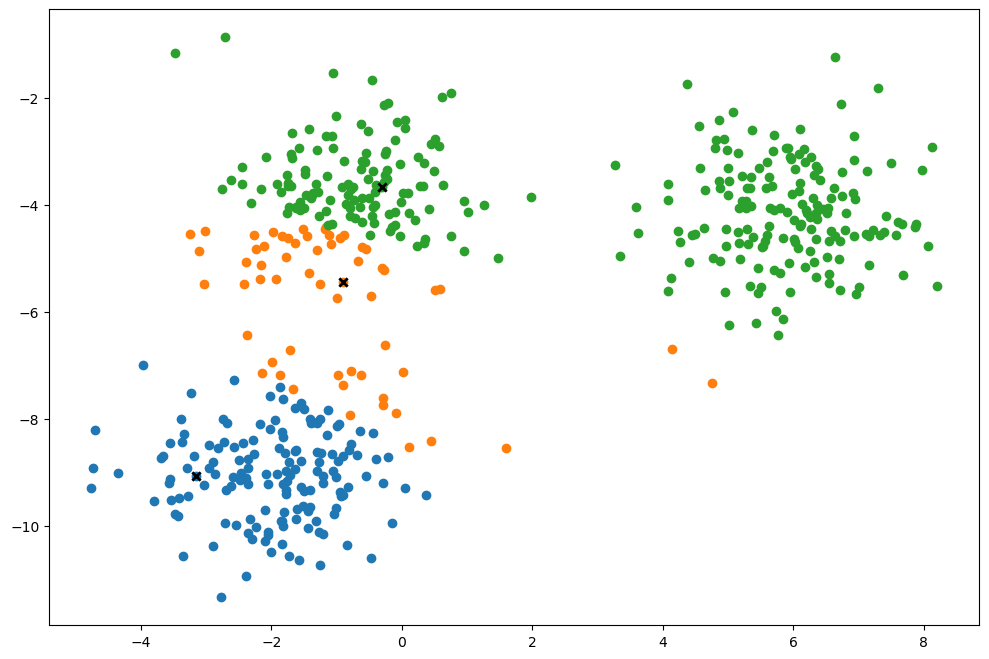

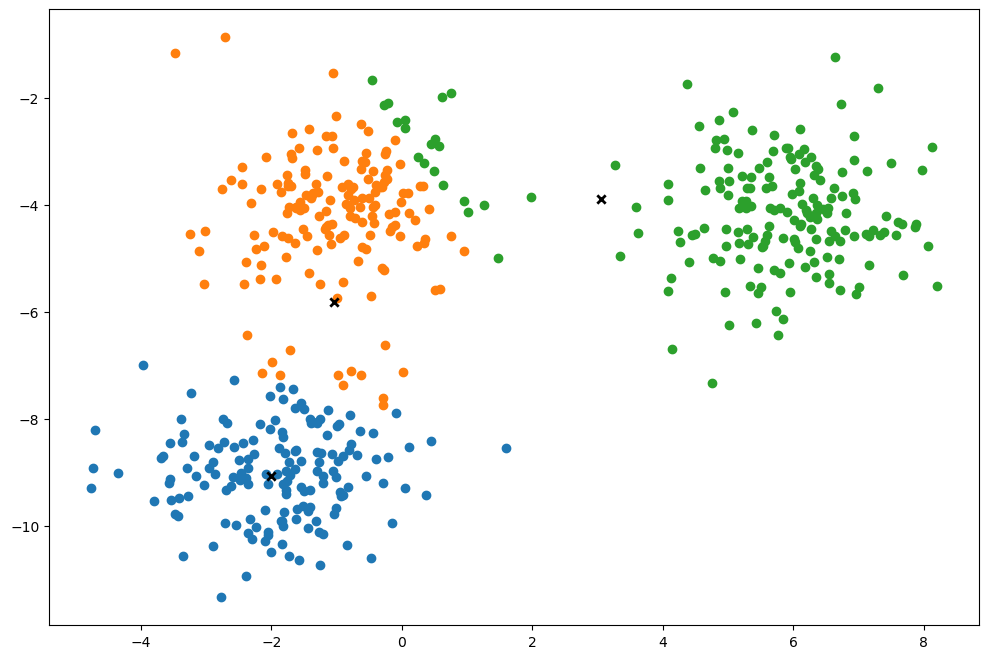

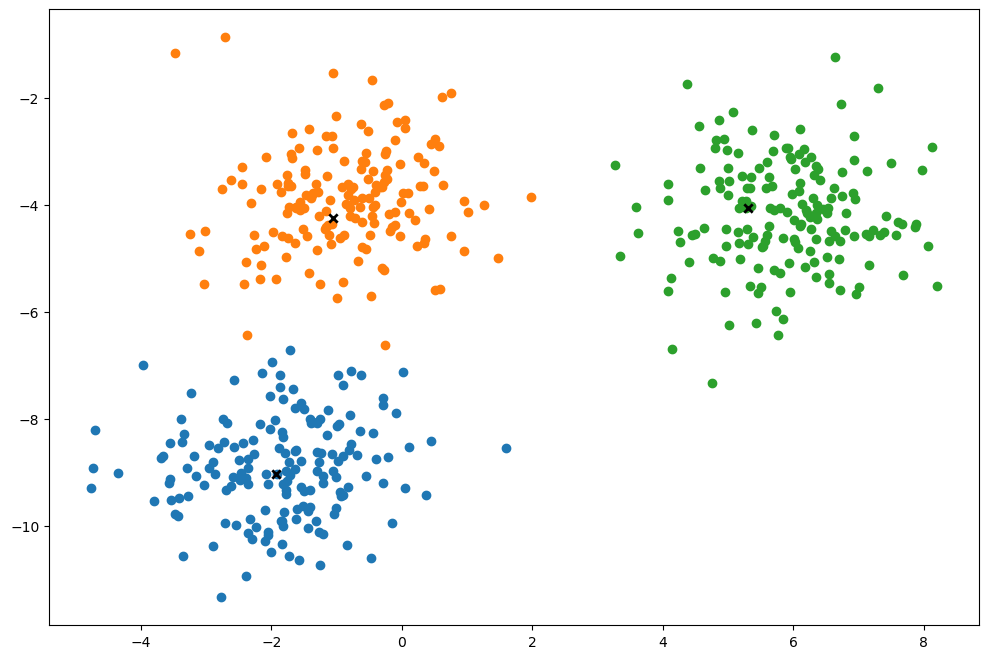

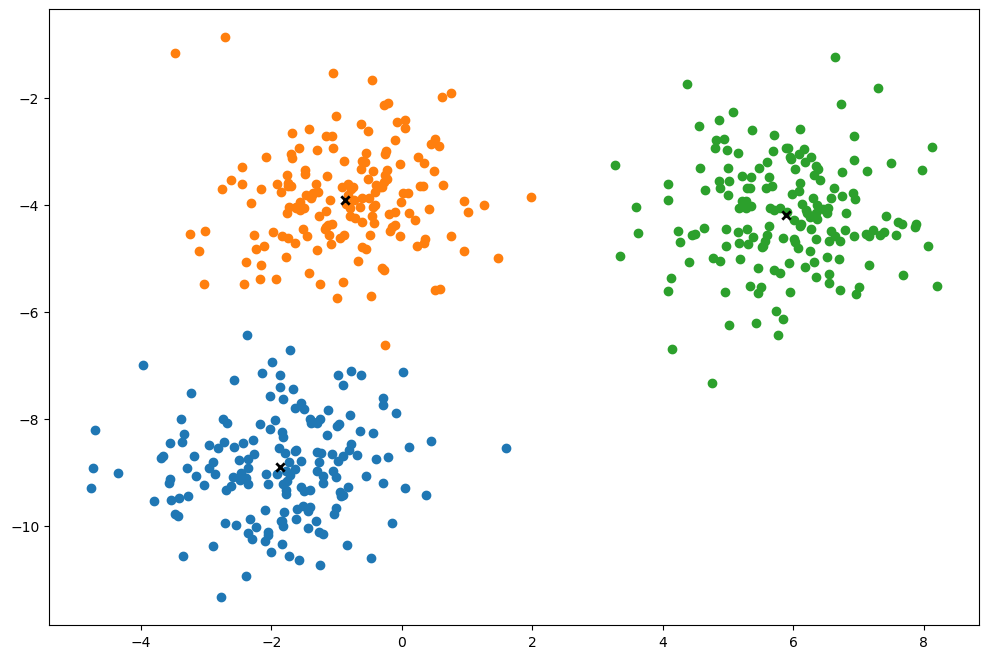

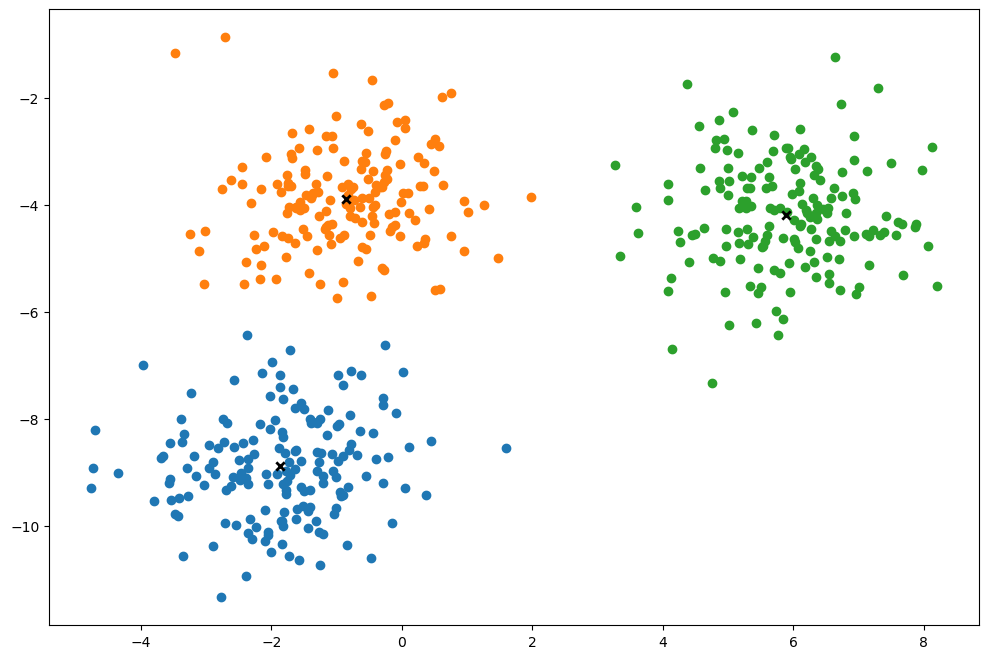

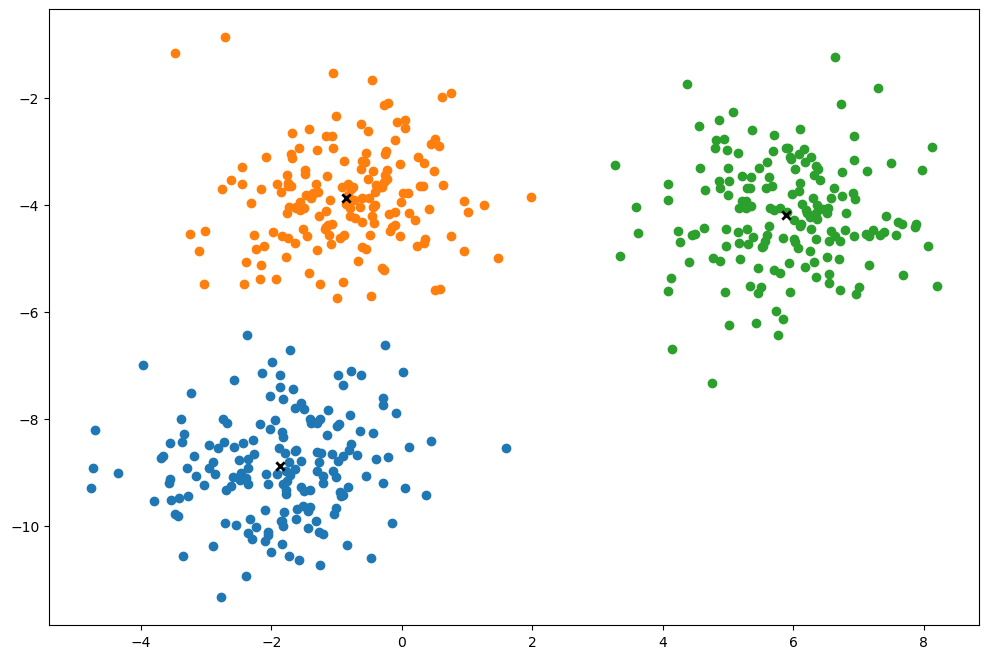

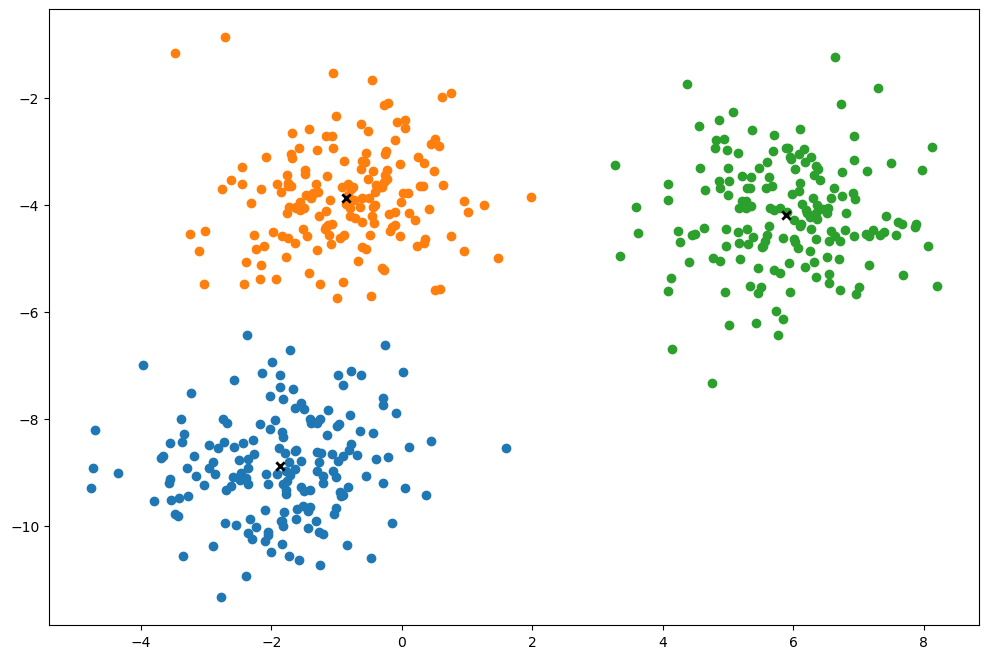

In [25]:
# Testing
if __name__ == "__main__":
    np.random.seed(42)
    from sklearn.datasets import make_blobs

    X, y = make_blobs(
        centers=3, n_samples=500, n_features=2, shuffle=True, random_state=40
    )
    print(X.shape)

    clusters = len(np.unique(y))
    print(clusters)

    k = KMeans(K=clusters, max_iters=150, plot_steps=True)
    y_pred = k.predict(X)

    k.plot()

## KMeans (without using numpy)
This implementation is practical only for small data samples; it operates under the assumption that all samples are contained within a nested list.

#### Test point
- Initialize k centroids randomly use `random.sample` (use `random.choices` will have replacement issue)
- Use `x.index(min(x))` instead of `np.argmin(x)`
- For the centroid calculation, use `tuple(sum(x)/len(x) for x in cluster)` to calculate the average of a nested list as a tuple;
- Since the input and output is a nested list, we use `x, y = zip(*points); ax.scatter(x, y)` to plot

[[5.5716884298867395, -5.528879911535229], [0.0784596387927845, -3.505935881026116], [5.332512048402712, -3.760452809784911], [-1.135992447733614, -7.837144754538649], [0.44623090475727256, -8.40386914336722], [4.75369052552816, -4.3875893354964095], [-0.9612614747955425, -2.649114030155231], [-0.6994941062167036, -3.8128035813580277], [-1.7921863380484926, -8.634725781420828], [-1.2579777886911012, -8.007434959150155]]
3


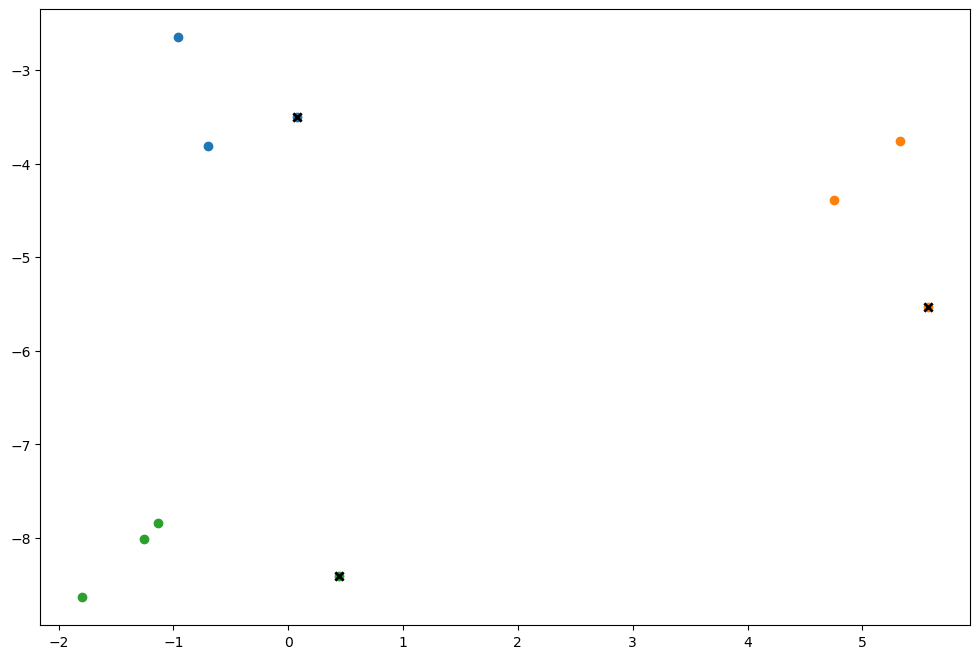

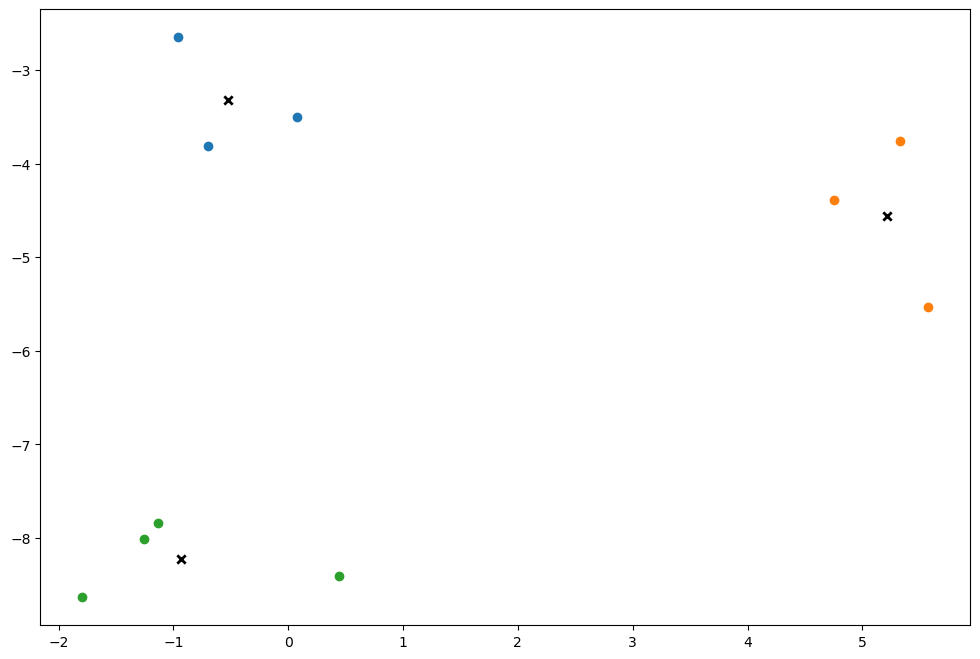

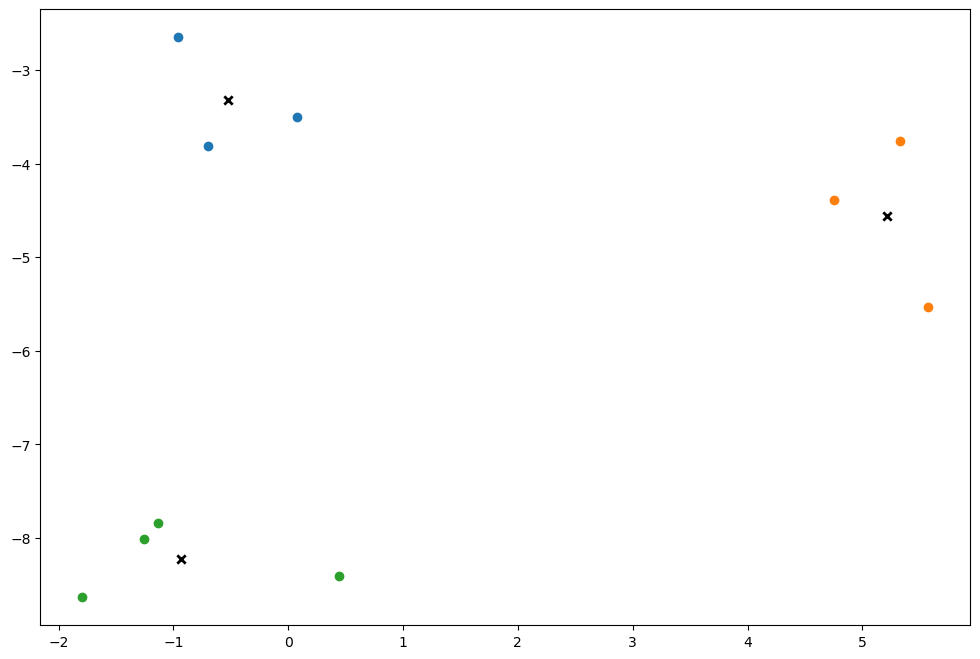

In [58]:
import random
from math import sqrt
import matplotlib.pyplot as plt 

class KMeans_wo_numpy:
    def __init__(self, K = 5, max_iters = 100, plot_steps = True):
        self.K = K 
        self.max_iters = max_iters
        self.plot_steps = plot_steps

        # lists of sample indicices for each cluster
        self.clusters = [[] for _ in range(self.K)]
        # list of centroids 
        self.centroids = []

    @staticmethod
    def euclidean_distance(x, y):
        return sqrt(sum((i-j)**2 for i, j in zip(x, y)))
    
    def predict(self, X):
        self.X = X 
        self.n_samples, self.n_features = len(X), len(X[0])

        # initialize centroid randomly from exist data 
        self.centroids = random.sample(X, k=self.K) # replace np.random.choice. Note random.choices will have replacement issue
        
        # iterate to optimize clusters
        for _ in range(self.max_iters):
            # assign sample to the closet centroids 
            self.clusters = self._create_clusters(self.centroids)

            if self.plot_steps:
                self.plot()
            
            # calculate new centroids from the clusters
            centroid_old = self.centroids
            self.centroids = self._get_centroids(self.clusters)

            # check if the algorithm is converged by comparing old and new centroids
            if self._is_converged(centroid_old, self.centroids):
                break

        return self._get_cluster_labels(self.clusters)

    def _create_clusters(self, centroids):
        # assign the sample to the closest centroids
        clusters = [[] for _ in range(self.K)]
        for idx, x in enumerate(self.X):
            dists = [self.euclidean_distance(x, center) for center in centroids]
            cluster_idx = dists.index(min(dists)) # replace np.argmin
            clusters[cluster_idx].append(idx)
        return clusters 
    
    def _get_centroids(self, clusters):
        centroids = [None] * self.K # np.zeros((self.K, self.n_features)) # replace np.zeros 
        for idx, cluster_sample_idx in enumerate(clusters):
            cluster_sample = [self.X[i] for i in cluster_sample_idx]
            # average all the sample 
            new_centroid = tuple(sum(p)/len(p) for p in zip(*cluster_sample)) # replace np.mean, must convert to tuple or list, otherwise create a generator
            centroids[idx] = new_centroid
        return centroids 
    
    def _is_converged(self, centroid_old, centroid_new, tol = 0.01):
        # If distance between old and new centroids are small, we think it' converged
        distances = [self.euclidean_distance(n, o) for n, o in zip(centroid_old, centroid_new)]
        return sum(distances) < tol

    def _get_cluster_labels(self, clusters):
        # extend the cluster nested lists to get label for each sample
        labels = [None] * self.n_samples
        for cluster_idx, cluster in enumerate(clusters):
            for sample_idx in cluster:
                labels[sample_idx] = cluster_idx 
        return labels 
    
    def plot(self):
        fig, ax = plt.subplots(figsize = (12,8))
        for i, idx in enumerate(self.clusters):
            points = [self.X[p] for p in idx]
            if not points:
                continue
            x, y = zip(*points) 
            ax.scatter(x, y)

        for center in self.centroids:
            ax.scatter(*center, marker = "x", color = "black", linewidth = 2)
        
        plt.show()

# Testing
if __name__ == "__main__":
    random.seed(42)
    from sklearn.datasets import make_blobs
    
    X, y = make_blobs(
        centers=3, n_samples=10, n_features=2, shuffle=True, random_state=40
    )
    X = X.tolist()
    print(X)

    clusters = len(set(y))
    print(clusters)

    k = KMeans_wo_numpy(K=clusters, max_iters=10, plot_steps=True)
    y_pred = k.predict(X)
    k.plot()